# we rate dogs project 
data wrangling process 'gather' , 'assess' , 'clean' 

In [2]:
# importing library 

import pandas as pd
import numpy as nb
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


# data gathering 
1- twitter-archive-enhanced.csv  "already uploded dowloded"

2- downlod by request - https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv 'image-predection"
3- 'tweet_json.txt'  

In [5]:
# make a 'twitter-archive-enhanced.csv' data frame

twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv') 

In [4]:
# downlod 'image-predection
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(file_url)
file_name = file_url.split('/')[-1]

with open( file_name , 'wb') as f:
    f.write(r.content)

# make a 'twitter-archive-enhanced.csv' data frame
image_predictions_df = pd.read_csv('image-predictions.tsv' , sep = '\t')

In [ ]:
# my api process code to prepare tweet_json.txt

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# twitter_archive_enhanced_df is a DataFrame with the twitter_archive_enhanced.csv file. You may have to

tweet_ids = twitter_archive_enhanced_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

##### extracting data from  'tweet_json.txt' to a tweets_information df
    1- txt to json https://www.educative.io/edpresso/what-is-the-difference-between-jsonloads-and-jsondumps
    2- extract object tweet ID, retweet count, and favorite count into a list of dictionaries.
    3- make dataframe from list of dictionaries 

In [6]:
tweet_info_list = [] 

with open('tweet_json.txt', 'r') as tweets_file :
    for tweet in tweets_file :
        tweet_object = json.loads(tweet)
        ID = tweet_object['id']
        retweet_count = tweet_object['retweet_count']
        favorite_count = tweet_object['favorite_count']
        
        tweet_info_list.append( { 'tweet_id' : ID ,
                                  'retweet_count' : retweet_count ,
                                  'favorite_count' : favorite_count 
                                })        

tweets_information_df = pd.DataFrame( tweet_info_list ) 

## gathering is done ^^
### now i have 3 data frames
    - twitter_archive_enhanced_df
    - image_predictions_df
    - tweets_information_df

# data assesing 

1-visual assesing .
    i asses the data by excel too . 

###### twitter_archive_enhanced_df

In [ ]:
twitter_archive_enhanced_df

twitter_archive_enhanced_df notes :-

quality :-
    -there is nul values presented as NANE 
    - 'replay_to_status_id' and 'in_replay_to_user_id'  have many missing values
    - 'source' has a html tag 'need to extract source only 
    - some weets text start with 'RT @dog_rates:'
    - 'retweeted_status_id' and 'retweeted_status_user_id' have many missing values
    -ther is a dogs named ['a' , 'quite' , 'General' ] which clearly not dogs name , there is missng names 
    -ther is missy url 
   - there is incorrect rating numerator and demenrator [ 960/0 ] , 11/15 , 24/7 , 9/11 , 165/150 ,... ]
           --> some are true as i see the text 
   - incorrect posts as @docmisterio account started on 11/15/15
   -ther is dogs with two dog state 
tidness :
    - 1 variable in 4 column [ 'doggo' , 'floofer' , 'pupper' , 'puppo' ] 
   

##### tweets_information_df

In [ ]:
 image_predictions_df

##### tweets_information_df 

In [ ]:
tweets_information_df

2-programatic assesing

In [8]:
# knowing the shape of every data frame 
print('the number of column in twitter_archive_enhanced_df is {} and the number of raw is {}'.format(twitter_archive_enhanced_df.shape[0],twitter_archive_enhanced_df.shape[1] ))
print('the number of column in image_predictions_df is {} and the number of raw is {}'.format(image_predictions_df.shape[0],image_predictions_df.shape[1] ))
print( 'the number of column in tweets_information_df is {} and the number of raw is {}'.format(tweets_information_df.shape[0],tweets_information_df.shape[1] ))

the number of column in twitter_archive_enhanced_df is 2356 and the number of raw is 17
the number of column in image_predictions_df is 2075 and the number of raw is 12
the number of column in tweets_information_df is 2354 and the number of raw is 3


##### note -> number of raw is not the same in the 3 data there is missing records in image prediction and tweets information  

In [9]:
#see info for data types 
twitter_archive_enhanced_df.head(1) # to see a sample data to judge data types

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [10]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_predictions_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [12]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweets_information_df.head(1)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193


In [14]:
tweets_information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


twitter_archive_enhanced_df data types problems :-

   1- [weet_id ,in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id retweeted_status_user_id ] is numbers->string 
   
   2- timestamp is object --> date formate
   
   3- 'doggo' , 'floofer' , 'pupper' , 'puppo' is object --> boolean
    
 image_predictions_df data types problem :-
     
     1- id is int -> string 
 tweets_information_df data type information :- 
     
     1- id is in -> string 

In [15]:
twitter_archive_enhanced_df[['rating_numerator' , 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


    - demenrator can't equal to 0 or bigger thn 10  .
    - numerator > 20 --> i see the original tweets and undersatnd that this number is in the case of group o dogs    

In [16]:
twitter_archive_enhanced_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive_enhanced_df[twitter_archive_enhanced_df['rating_numerator'] > 20]['rating_numerator'].value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
204     1
45      1
88      1
143     1
1776    1
44      1
50      1
26      1
84      1
182     1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [18]:
image_predictions_df.describe()
tweets_information_df[['favorite_count' , 'retweet_count']].describe( )

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


i see no problem in image prediction statistics
favoritecount and  retweet = 0 do't make sense 

In [19]:
print('ther is {} tweets that have 0 retweet'
       .format(tweets_information_df[ tweets_information_df['retweet_count']==0].count()[1]))
print( 'ther is {} tweets that have 0 favorite_count'
        .format(tweets_information_df[ tweets_information_df['favorite_count']==0].count()[1] ))

ther is 1 tweets that have 0 retweet
ther is 179 tweets that have 0 favorite_count


In [20]:
# check duplicated itens 

print('number of duplicated raws in tweets_information_df is :',twitter_archive_enhanced_df.duplicated().sum())
print('number of duplicated raws in image_predictions_df is :',image_predictions_df.duplicated().sum())
print('number of duplicated raws in tweets_information_df is :',tweets_information_df.duplicated().sum())

number of duplicated raws in tweets_information_df is : 0
number of duplicated raws in image_predictions_df is : 0
number of duplicated raws in tweets_information_df is : 0


In [21]:
# checking the null values 

twitter_archive_enhanced_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
tweets_information_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [24]:
print(twitter_archive_enhanced_df['doggo'].unique())  # no problems
print(twitter_archive_enhanced_df['floofer'].unique())  # no problems
print(twitter_archive_enhanced_df['pupper'].unique())  # no problems
print(twitter_archive_enhanced_df['puppo'].unique())  # no problems



['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


# assesing is done ^^

### isuues documentation

### quality isuues 
##### twitter_archive_enhanced_df 
    1- wrong data types :
            1- any column describe an ID should br string string
            2- timestamp should be at  date formate
            3- 'doggo' , 'floofer' , 'pupper' , 'puppo' should be boolean
                    
    2- 'source' column has the tag apear in it 
            '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
              should be "http://twitter.com/download/iphone" 
    
    3- many null values in 'in_reply_to_status_id' ,'in_reply_to_user_id' ,'retweeted_status_id' ,'retweeted_status_user_id' ,                 'retweeted_status_timestamp', 'expanded_urls' 
   
    4- invalid dog names.
    5-invalid rating_numerator and rating_denominator 
    6-there many issues in tweet text "check the pdf"
    7- wrrong presentation od NULL in name column
    8- there is unneeded column 

    
##### image_prediction_df 
    1- wrong ID data type , it should be string
    2- in image_prediction_df (p1, p2 and p3) aren't descriptive names  


##### tweets_information_df 
    1- wrong ID data type , it should be string

### tidness isuues 
    1-  in twitter_archive_enhancment 1 variable in 4 column [ 'doggo' , 'floofer' , 'pupper' , 'puppo' ] 

    2-  data in 3 seperate tables
    
   
there is missing record in twitter_predection  and tweets_information 

# data cleaning 

In [25]:
#make copies for cleaning 
twitter_archive_enhanced_clean_df = twitter_archive_enhanced_df.copy() 
image_predictions_clean_df = image_predictions_df.copy()
tweets_information_clean_df = tweets_information_df.copy()

 ### quality issues

### define
    - convert  [tweet_id ] to string

In [26]:
twitter_archive_enhanced_clean_df['tweet_id'].dtype

dtype('int64')

##### code

In [27]:
twitter_archive_enhanced_clean_df['tweet_id'] = twitter_archive_enhanced_clean_df['tweet_id'].astype(str)

##### test 

In [28]:

twitter_archive_enhanced_clean_df['tweet_id'].dtype

dtype('O')

### define

In [29]:
# define change nane to null value in names
print(twitter_archive_enhanced_clean_df['name'].isnull().sum())

#code 
twitter_archive_enhanced_clean_df['name'].replace( 'None' , nb.nan , inplace= True )

#test
print(twitter_archive_enhanced_clean_df['name'].isnull().sum())


0
745


### define
    -convert timestamp to date format 

In [30]:
twitter_archive_enhanced_clean_df['timestamp'].dtype

dtype('O')

##### code

In [31]:
twitter_archive_enhanced_clean_df['timestamp'] = pd.to_datetime( twitter_archive_enhanced_clean_df['timestamp'])

##### test 

In [32]:
twitter_archive_enhanced_clean_df['timestamp'].dtype

dtype('<M8[ns]')

### define
    - remove html tag from source column

In [33]:
twitter_archive_enhanced_clean_df['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

##### code

In [34]:
modified_source = [] 

try :
    for source in twitter_archive_enhanced_clean_df['source'] :
        modified_source.append(source.split('"')[1])
    twitter_archive_enhanced_clean_df['source'] = modified_source
except :
    print('already deleted')

##### test

In [35]:
twitter_archive_enhanced_clean_df['source'].unique()

array(['http://twitter.com/download/iphone', 'http://twitter.com',
       'http://vine.co', 'https://about.twitter.com/products/tweetdeck'], dtype=object)

### define
    - remove all column that have many null values

In [36]:
null_column = twitter_archive_enhanced_clean_df.columns[twitter_archive_enhanced_clean_df.isnull().sum() > 2000 ]

##### code

In [37]:
twitter_archive_enhanced_clean_df.drop( list(null_column) , axis=1 , inplace = True) 

In [38]:
# no need for 'expanded_urls'
try :
    twitter_archive_enhanced_clean_df.drop( 'expanded_urls' , axis=1 , inplace = True) 
except :
    print('alredy deleted')

##### test 

In [39]:
twitter_archive_enhanced_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


### define
    invalid rating_numerator and rating_denominator by its real value 

In [40]:
# wrong values 
wrong_value = twitter_archive_enhanced_clean_df['rating_denominator'].unique()[ twitter_archive_enhanced_clean_df['rating_denominator'].unique() != 10]
print('wrong values is ' , wrong_value)

print('id with wrong values')
for value in wrong_value :
    print( twitter_archive_enhanced_clean_df['tweet_id'][twitter_archive_enhanced_clean_df['rating_denominator'] == value] )



wrong values is  [  0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]
id with wrong values
313    835246439529840640
Name: tweet_id, dtype: object
342    832088576586297345
Name: tweet_id, dtype: object
433    820690176645140481
Name: tweet_id, dtype: object
516    810984652412424192
Name: tweet_id, dtype: object
784     775096608509886464
1068    740373189193256964
1662    682962037429899265
Name: tweet_id, dtype: object
902    758467244762497024
Name: tweet_id, dtype: object
1120    731156023742988288
Name: tweet_id, dtype: object
1165    722974582966214656
1598    686035780142297088
Name: tweet_id, dtype: object
1202    716439118184652801
1274    709198395643068416
1351    704054845121142784
Name: tweet_id, dtype: object
1228    713900603437621249
Name: tweet_id, dtype: object
1254    710658690886586372
1843    675853064436391936
Name: tweet_id, dtype: object
1433    697463031882764288
Name: tweet_id, dtype: object
1634    684225744407494656
Name: tweet_id, dtype: o

now i will check this values visually by my self to get the righ answer
313    835246439529840640 ->  10
342    832088576586297345 -> wrong data
433    820690176645140481 -> group of dogs
516    810984652412424192 -> 7
784    775096608509886464 -> 10
1068   740373189193256964 -> 10
1662   682962037429899265 -> 10
902    758467244762497024 -> group of dogs
1120   731156023742988288 -> group of dogs
1165   722974582966214656 ->  10
1598   686035780142297088 -> group of dogs
1202   716439118184652801 -> 10
1274   709198395643068416 -> group of dogs 
1351   704054845121142784 ->  group of dogs 
1228   713900603437621249 -> group of dogs  
1254   710658690886586372 -> group of dogs 
1843   675853064436391936 -> group
1433   697463031882764288 ->group
1634   684225744407494656 -> group 
1635   684222868335505415 -> group
1663   682808988178739200 -> 16
1779   677716515794329600 -> group
2335   666287406224695296 -> 10


In [41]:
twitter_archive_enhanced_clean_df['tweet_id'][twitter_archive_enhanced_clean_df['rating_numerator'] > 20 ]


188     855862651834028034
189     855860136149123072
290     838150277551247360
313     835246439529840640
340     832215909146226688
433     820690176645140481
516     810984652412424192
695     786709082849828864
763     778027034220126208
902     758467244762497024
979     749981277374128128
1120    731156023742988288
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1634    684225744407494656
1635    684222868335505415
1712    680494726643068929
1779    677716515794329600
1843    675853064436391936
2074    670842764863651840
Name: tweet_id, dtype: object

188     855862651834028034 -> no problem
189     855860136149123072 -> no problem  
290     838150277551247360 -> no problem 
313     835246439529840640 -> 13
340     832215909146226688 -> 9.75
433     820690176645140481 ->group
516     810984652412424192 ->no problem
695     786709082849828864 -> 9..75
763     778027034220126208 -> 11.27
902     758467244762497024 -> group
979     749981277374128128 -> no problem
1120   731156023742988288 -> group
1202   716439118184652801 -> 11
1228   713900603437621249 -> group
1254   710658690886586372 -> group
1274   709198395643068416 -> group
1351   704054845121142784 ->group
1433   697463031882764288 -> group
1634   684225744407494656 -> group
1635   684222868335505415 ->group
1712   680494726643068929 -> 11.26
1779   677716515794329600 ->group
1843   675853064436391936 ->group
2074   670842764863651840 ->  not doog 

##### code

In [42]:
# with inner view the is floting poin rating_numerator 
twitter_archive_enhanced_clean_df['rating_numerator'] = twitter_archive_enhanced_clean_df['rating_numerator'].astype(float)
twitter_archive_enhanced_clean_df['rating_denominator'] = twitter_archive_enhanced_clean_df['rating_denominator'].astype(float)



#In the case of group I will divide them by there number 88/80  11/10
#820690176645140481 ->group  84/70  -->  12/10  
# 758467244762497024 -> group  165/150 -->  12/10  
# 731156023742988288 -> group  204/170 --> 12/10
# 713900603437621249 -> group 99/90 -> 11/10
# 709198395643068416 -> group 45/50 -> 9/10
# 704054845121142784 -> group 60/50 -> 12/10
# 697463031882764288 -> group 44/40 -> 11/10
# 684225744407494656 -> group 143/130 -> 11/10
#684222868335505415 ->group 121/110 -> 11/10
#677716515794329600 ->group 144/120 -> 12/10
#675853064436391936 ->group 88/80 -> 11/10
 
modified_id = { '820690176645140481' : [ 12 , 10 ] ,
                '758467244762497024' : [ 12 , 10 ] ,
                '731156023742988288' : [ 12 , 10 ] ,
                '713900603437621249' : [ 11 , 20 ] ,
                '709198395643068416' : [ 9  , 10 ] ,
                '704054845121142784' : [ 12 , 10 ] ,
                '697463031882764288' : [ 11 , 10 ] ,
                '684225744407494656' : [ 11 , 10 ] ,
                '684222868335505415' : [ 11 , 10 ] ,
                '677716515794329600' : [ 12 , 10 ] ,
                '675853064436391936' : [ 11 , 10 ] ,
                '710658690886586372' : [ 10 , 10 ] ,
                '810984652412424192' : [34.28 , 10 ]
            }
#denominators need to be 10 
#835246439529840640  ->  10
#775096608509886464 -> 10
#740373189193256964 -> 10
#682962037429899265 -> 10
#722974582966214656 ->  10
#716439118184652801 -> 10
#682808988178739200 -> 16
#666287406224695296 -> 10

dum_list = [ '835246439529840640' , '775096608509886464' , '740373189193256964' , '682962037429899265' , '722974582966214656' 
                    , '716439118184652801' , '682808988178739200' , '666287406224695296' ]

#numerator need to be fixed 
#835246439529840640 -> 13
#832215909146226688 -> 9.75
#786709082849828864 -> 9.75
#778027034220126208 -> 11.27
#716439118184652801 -> 11
#680494726643068929 -> 11.26

num_dict = {'835246439529840640' : 13 ,
            '832215909146226688' : 9.75 ,
            '786709082849828864' : 9.75 ,
            '778027034220126208' : 11.27 ,
            '716439118184652801' : 11 ,
            '680494726643068929' : 11.26 ,
}

for k,v in modified_id.items() :
    twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['tweet_id']==k, ['rating_numerator']] = v[0]
    twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['tweet_id']==k, ['rating_denominator']] = v[1]

for ID in dum_list :
        twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['tweet_id']==ID, ['rating_denominator']] = 10

for k,v in num_dict.items() :
        twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['tweet_id']==k, ['rating_numerator']] = v




In [43]:
indexes = twitter_archive_enhanced_clean_df[['tweet_id' ]][twitter_archive_enhanced_clean_df['rating_numerator'] > 100 ].index
 
#i will remove them becuse they are outlayes
twitter_archive_enhanced_clean_df.drop(indexes, inplace=True)

In [44]:
# in valid_data 
twitter_archive_enhanced_clean_df.drop(twitter_archive_enhanced_clean_df[ twitter_archive_enhanced_clean_df['tweet_id'] == '832088576586297345'].index, inplace=True)

##### test

In [45]:
wrong_value = twitter_archive_enhanced_clean_df['rating_denominator'].unique()[ twitter_archive_enhanced_clean_df['rating_denominator'].unique() != 10]
print('wrong values is ' , wrong_value)


wrong values is  [ 20.]


In [46]:
twitter_archive_enhanced_clean_df[['rating_numerator' ]][twitter_archive_enhanced_clean_df['rating_numerator'] > 20 ]


,rating_numerator
516,34.28


### define
    - remove undefined text 'already removed in rating_denominator process'
    - mofifiy text which starts with "RT @dog_rates:”

In [47]:
twitter_archive_enhanced_clean_df['text'].str.startswith('RT @dog_rates: ').sum()

156

##### code

In [48]:
for text in twitter_archive_enhanced_clean_df['text']  :
    if text.startswith('RT @dog_rates: ') :
        twitter_archive_enhanced_clean_df['text'].replace(text , text.replace('RT @dog_rates: ' , '') , inplace = True)



##### test

In [49]:
twitter_archive_enhanced_clean_df['text'].str.startswith('RT @dog_rates: ').sum()

0

### define
    -change tweep id data_type in image image_predictions_clean_df

In [50]:
image_predictions_clean_df['tweet_id'].dtype

dtype('int64')

##### code

In [51]:
image_predictions_clean_df['tweet_id'] = image_predictions_clean_df['tweet_id'].astype(str)

##### test 

In [52]:
image_predictions_clean_df['tweet_id'].dtype

dtype('O')

### define
    -change tweep id data_type in image rweets_info_clean_df

In [53]:
tweets_information_clean_df['tweet_id'].dtype

dtype('int64')

##### code

In [54]:
tweets_information_clean_df['tweet_id'] = tweets_information_clean_df['tweet_id'].astype(str)

##### test 

In [55]:
tweets_information_clean_df['tweet_id'].dtype

dtype('O')

tidness overview

In [56]:
twitter_archive_enhanced_clean_df.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
154,862096992088072192,2017-05-10 00:08:34,http://twitter.com/download/iphone,We only rate dogs. Please don't send perfectly...,13.0,10.0,NaN,None,None,None,None


In [57]:
twitter_archive_enhanced_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2350 non-null object
timestamp             2350 non-null datetime64[ns]
source                2350 non-null object
text                  2350 non-null object
rating_numerator      2350 non-null float64
rating_denominator    2350 non-null float64
name                  1610 non-null object
doggo                 2350 non-null object
floofer               2350 non-null object
pupper                2350 non-null object
puppo                 2350 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 220.3+ KB


##### define
- in image_prediction_df (p1, p2 and p3) aren't descriptive names  

In [58]:
print(image_predictions_clean_df.columns)
#code
image_predictions_clean_df.rename(columns={"p1":'predictio_1' ,
                                           "p2" : ' prediction_2' ,
                                           "p3": ' prediction_3' ,
                                           "p4" : ' prediction_3' } ,inplace = True)
#i will not use 'img_num' and 'img_num' so i wil drop them 
image_predictions_clean_df.drop(['img_num', 'jpg_url'] , axis=1 , inplace = True )

#test
print(image_predictions_clean_df.columns)



Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['tweet_id', 'predictio_1', 'p1_conf', 'p1_dog', ' prediction_2',
       'p2_conf', 'p2_dog', ' prediction_3', 'p3_conf', 'p3_dog'],
      dtype='object')


 ### tidness issues

### define
    - in twitter_archive_enhancment  there is 1 variable in 4 column [ 'doggo' , 'floofer' , 'pupper' , 'puppo' ]  but it better to be represented in one column called dog stage .

In [59]:
twitter_archive_enhanced_clean_df[ [ 'doggo' , 'floofer' , 'pupper' , 'puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


##### clean 
    -

In [60]:

twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
twitter_archive_enhanced_clean_df.loc[twitter_archive_enhanced_clean_df['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

twitter_archive_enhanced_clean_df['dog_stage'] = twitter_archive_enhanced_clean_df['dog_stage'].astype('category')

In [61]:
twitter_archive_enhanced_clean_df[ [ 'doggo' , 'floofer' , 'pupper' , 'puppo' , 'dog_stage']].sample(5)

,doggo,floofer,pupper,puppo,dog_stage
2186,None,None,None,None,NaN
1208,None,None,None,None,NaN
1924,None,None,None,None,NaN
1525,None,None,None,None,NaN
2066,None,None,None,None,NaN


In [62]:
#remove unusfull column now
twitter_archive_enhanced_clean_df.drop([ 'doggo' , 'floofer' , 'pupper' , 'puppo' ] , axis = 1 , inplace = True )

##### test 

In [63]:
try :
    print(twitter_archive_enhanced_clean_df[ [ 'doggo' , 'floofer' , 'pupper' , 'puppo']].head())
except :
    print(twitter_archive_enhanced_clean_df['dog_stage'].head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_stage, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]


## merge data frames

In [64]:
## merging the 3 clean data frames togther using merge 
twitter_master_archive_df1 = pd.merge(twitter_archive_enhanced_clean_df,tweets_information_clean_df,how='inner',on='tweet_id')
twitter_master_archive_df = pd.merge(twitter_master_archive_df1 , image_predictions_clean_df ,how='inner',on='tweet_id')

twitter_master_archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,predictio_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,39467,8853,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,33819,6514,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,25461,4328,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,42908,8964,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,41048,9774,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [65]:
## the final clean file in csv formate 'twitter_archive_master.csv'  
twitter_master_archive_df.to_csv('twitter_archive_master.csv' , index = False )

## cleaning is done ^^
### final cleaned data files  in 'twitter_archive_master.csv'

In [66]:
twitter_master_archive_df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,predictio_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
1863,669942763794931712,2015-11-26 18:16:16,http://twitter.com/download/iphone,This is Andru. He made his very own lacrosse s...,11.0,10.0,Andru,NaN,536,183,vizsla,0.743216,True,redbone,0.217282,True,Rhodesian_ridgeback,0.028473,True
1645,674082852460433408,2015-12-08 04:27:30,http://twitter.com/download/iphone,This is a Sagitariot Baklava mix. Loves her ne...,11.0,10.0,a,NaN,804,186,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.020683,False
1196,698195409219559425,2016-02-12 17:22:12,http://twitter.com/download/iphone,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,9.0,10.0,Beau,NaN,18408,6750,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1132,703769065844768768,2016-02-28 02:29:55,http://twitter.com/download/iphone,When you're trying to watch your favorite tv s...,10.0,10.0,NaN,NaN,3621,1276,boxer,0.838994,True,Greater_Swiss_Mountain_dog,0.088800,True,bull_mastiff,0.031684,True
1913,668852170888998912,2015-11-23 18:02:38,http://twitter.com/download/iphone,Say hello to Bobb. Bobb is a Golden High Fescu...,11.0,10.0,Bobb,NaN,479,184,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.022500,True


In [67]:
twitter_master_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 19 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  1495 non-null object
dog_stage             320 non-null category
favorite_count        2071 non-null int64
retweet_count         2071 non-null int64
predictio_1           2071 non-null object
p1_conf               2071 non-null float64
p1_dog                2071 non-null bool
 prediction_2         2071 non-null object
p2_conf               2071 non-null float64
p2_dog                2071 non-null bool
 prediction_3         2071 non-null object
p3_conf               2071 non-null float64
p3_dog                2071 non-null bool
dtypes: bool(3), category(1), datetime64[ns](1), float64(5), int64(2),

# analysis 

## questions :-
- dogs twith high degree of rating and people love 'more reactions" ?
-  what is the relation between favorites , retweet count , rating relation ? 
- The most common dog type ?
- The most common dog stage ?
- most common scores 
- relation between dog stage and favorites , retweet count , rating 

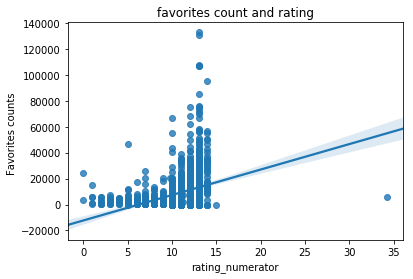

In [68]:
# relation between favorites , retweet count , rating 

g = sns.regplot(x=twitter_master_archive_df['rating_numerator'] , y=twitter_master_archive_df['favorite_count'])
plt.title("favorites count and rating")
plt.xlabel('rating_numerator')
plt.ylabel('Favorites counts ')
fig = g.get_figure()


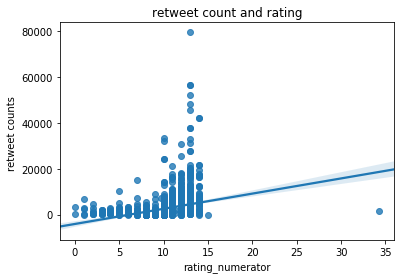

In [69]:
g = sns.regplot(x=twitter_master_archive_df['rating_numerator'] , y=twitter_master_archive_df['retweet_count'])
plt.title("retweet count and rating")
plt.xlabel('rating_numerator')
plt.ylabel('retweet counts ')
fig = g.get_figure()


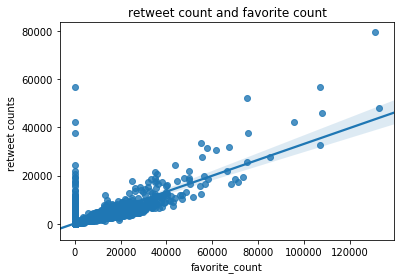

In [70]:
g = sns.regplot(x=twitter_master_archive_df['favorite_count'] , y=twitter_master_archive_df['retweet_count'])
plt.title("retweet count and favorite count")
plt.xlabel('favorite_count')
plt.ylabel('retweet counts ')
fig = g.get_figure()


In [71]:
#  dogs twith high degree of rating and people love .

dog_df = twitter_master_archive_df[ twitter_master_archive_df['p1_dog'] ==  True ].groupby('predictio_1')['rating_numerator' , 'favorite_count' , 'retweet_count' ].mean()
dog_df = dog_df[dog_df['rating_numerator' ] > 10 ]
dog_df = dog_df[ dog_df['favorite_count'] > dog_df['favorite_count'].mean()]
dog_df = dog_df[ dog_df['retweet_count'] > dog_df['retweet_count'].mean()]
dog_df.sort_values( ['rating_numerator' ,'retweet_count','rating_numerator'] , ascending = False )

,rating_numerator,favorite_count,retweet_count
predictio_1,,,
Saluki,12.500000,24060.000000,5133.750000
Tibetan_mastiff,12.400000,9738.800000,5335.800000
Eskimo_dog,11.777778,12001.555556,4768.888889
Samoyed,11.697674,12627.697674,4940.418605
Cardigan,11.526316,13699.315789,5123.105263
Great_Pyrenees,11.500000,12932.000000,4732.285714
cocker_spaniel,11.400000,10527.500000,4097.966667
Irish_water_spaniel,11.333333,16400.000000,4500.666667
French_bulldog,11.269231,17913.000000,4683.923077


In [72]:
twitter_master_archive_df[twitter_master_archive_df['rating_numerator'] == twitter_master_archive_df['rating_numerator'].max() ]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,predictio_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
415,810984652412424192,2016-12-19 23:06:23,http://twitter.com/download/iphone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,34.28,10.0,Sam,NaN,5927,1655,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [73]:
top_10_dog_type = twitter_master_archive_df[ twitter_master_archive_df['p1_dog'] ==  True ]['predictio_1'].value_counts().head(10)

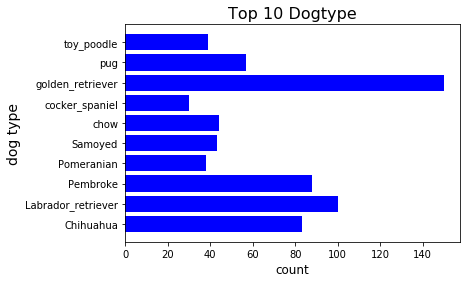

In [74]:
plt.barh(top_10_dog_type.index ,top_10_dog_type , color = 'b')

plt.ylabel('dog type', fontsize = 14)
plt.xlabel('count', fontsize = 12)
plt.title('Top 10 Dogtype', fontsize = 16)
plt.show();


In [75]:
dog_df = twitter_master_archive_df[ twitter_master_archive_df['p1_dog'] ==  True ].groupby('predictio_1')['rating_numerator' , 'favorite_count' , 'retweet_count' ].mean()
print(dog_df[ 'rating_numerator'  ]['golden_retriever'])
print(dog_df[ 'favorite_count'  ]['golden_retriever'])
print(dog_df[ 'retweet_count'  ]['golden_retriever'])

11.7018666667
11310.8466667
3874.46666667


In [76]:
top_stage = twitter_master_archive_df['dog_stage'].value_counts()

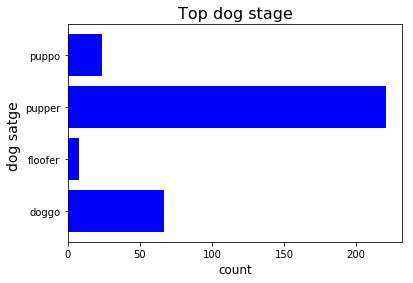

In [77]:
plt.barh(top_stage.index,top_stage , color = 'b')

plt.ylabel('dog satge ', fontsize = 14)
plt.xlabel('count', fontsize = 12)
plt.title('Top dog stage', fontsize = 16)
plt.show();


In [78]:
dog_df = twitter_master_archive_df.groupby('dog_stage')['rating_numerator' , 'favorite_count' , 'retweet_count' ].mean()
dog_df.sort_values( 'rating_numerator'  , ascending = False )

,rating_numerator,favorite_count,retweet_count
dog_stage,,,
puppo,12.041667,21777.083333,6963.291667
doggo,11.970149,18200.776119,7901.552239
floofer,11.875000,13701.375000,4776.750000
pupper,10.702579,7121.895928,2607.312217


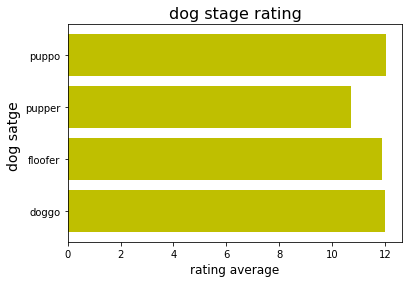

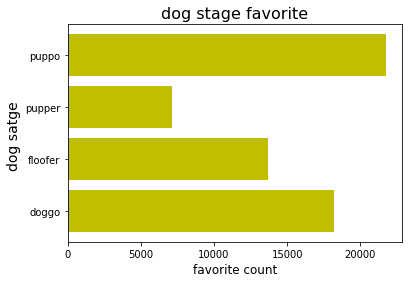

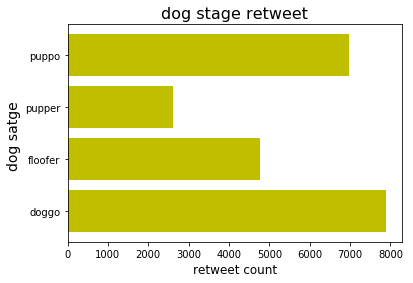

In [79]:
#relation between dog stage and  rating , favoriate and stage

plt.barh(dog_df.index,dog_df['rating_numerator'] , color = 'y')

plt.ylabel('dog satge ', fontsize = 14)
plt.xlabel('rating average', fontsize = 12)
plt.title('dog stage rating', fontsize = 16)
plt.show();

plt.barh(dog_df.index,dog_df['favorite_count'] , color = 'y')
plt.ylabel('dog satge ', fontsize = 14)
plt.xlabel('favorite count', fontsize = 12)
plt.title('dog stage favorite', fontsize = 16)
plt.show();

plt.barh(dog_df.index,dog_df['retweet_count'] , color = 'y')
plt.ylabel('dog satge ', fontsize = 14)
plt.xlabel('retweet count', fontsize = 12)
plt.title('dog stage retweet', fontsize = 16)
plt.show();


In [80]:
common_rate = twitter_master_archive_df['rating_numerator'].value_counts().head(10)

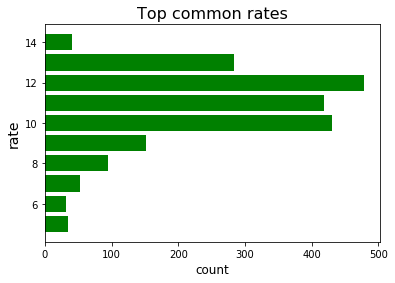

In [81]:
plt.barh(common_rate.index,common_rate , color = 'g')

plt.ylabel('rate', fontsize = 14)
plt.xlabel('count', fontsize = 12)
plt.title('Top common rates', fontsize = 16)
plt.show();